# Automatic PDF Reader

- Automatically read in a pdf financial statement with python

- The financial statement used in this demonstration was randomly generated and exported as a pdf

### Import Required Packages

In [1]:
import pdfplumber
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Specify the financial statement file path
pdf_file = 'Sample_Income_Statement.pdf'

In [3]:
# Extract the text from the specified pages
with pdfplumber.open(pdf_file)as pdf:
    page = pdf.pages[0]
    text = page.extract_text()

In [4]:
# Display the text from the income statement
print(text)

Income Statement
Base Rental Income 19700
CAM Reimbursement 100
Vacancy Loss 1500
Gross Income 18300
Property Management Fee 800
Property Taxes 500
Depreciation 3000
Interest Expense 700
Capital Expenditures 8000
Utilities 150
Total Expenses 13150
Net Income 5150


In [5]:
# Convert the text to a list object
text = text.split('\n')
text

['Income Statement',
 'Base Rental Income 19700',
 'CAM Reimbursement 100',
 'Vacancy Loss 1500',
 'Gross Income 18300',
 'Property Management Fee 800',
 'Property Taxes 500',
 'Depreciation 3000',
 'Interest Expense 700',
 'Capital Expenditures 8000',
 'Utilities 150',
 'Total Expenses 13150',
 'Net Income 5150']

In [6]:
# Find the the Base Rent
for row in text:
    if 'Base Rental Income' in row:
        base_rent = row.split()[-1]
    elif 'Base Rent' in row:
        base_rent = row.split()[-1]
    elif 'Potential Rent' in row:
        base_rent = row.split()[-1]
base_rent = int(base_rent)

print(f'The base rent reported was ${base_rent}')

The base rent reported was $19700


In [7]:
# Find the the Net Profit
for row in text:
    if 'Operating Profit' in row:
        profit = row.split()[-1]
    elif 'Net Income' in row:
        profit = row.split()[-1]
profit = int(profit)

print(f'Total profit reported was ${profit}')

Total profit reported was $5150


In [8]:
#Find and add back non-operating expenses
total_non_operating_expenses = 0

for row in text:
    if 'Interest' in row:
        int_expense = int(row.split()[-1])
        total_non_operating_expenses += int_expense
        
    if 'Depreciation' in row:
        dep_expense = int(row.split()[-1])
        total_non_operating_expenses += dep_expense
        
    if 'Capital Expenditures' in row:
        capex = int(row.split()[-1])       
        total_non_operating_expenses += capex

NOI = profit + total_non_operating_expenses
print(f'Total NOI calculated was ${NOI}')

Total NOI calculated was $16850


<BarContainer object of 3 artists>

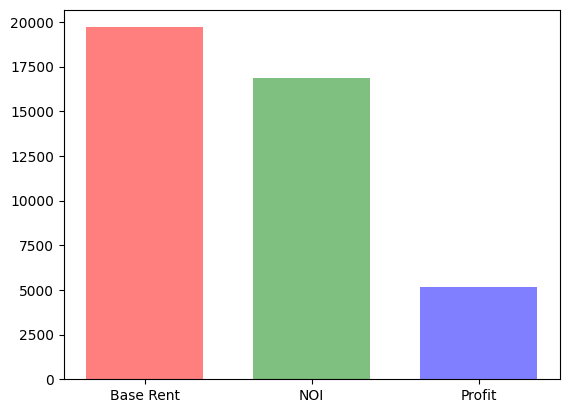

In [10]:
# Visualize values
df = pd.DataFrame()
category = ['Base Rent','NOI', 'Profit']
value = [base_rent, NOI, profit]
df['Category'] = category
df['AMT'] = value

plt.bar(data = df, height = 'AMT', x= 'Category',color=['red', 'green', 'blue'], 
        width=0.7, alpha=0.5)